# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd

In [134]:
df = pd.read_csv('creditcard.csv')
df.V1

0         -1.359807
1          1.191857
2         -1.358354
3         -0.966272
4         -1.158233
            ...    
284802   -11.881118
284803    -0.732789
284804     1.919565
284805    -0.240440
284806    -0.533413
Name: V1, Length: 284807, dtype: float64

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = df.drop(columns=['Class'])
y = df['Class']

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg  = log_reg.predict_proba(X_test)[:, 1]

In [7]:
from collections import Counter
print(Counter(y_train))

y_pred_const = np.zeros(len(X_test))

Counter({0: 255880, 1: 446})


Значит нормальных транзакций в 560 рах больше, чем мошеннические. Поэтому будем считать, что все люди честные.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_proba_knn  = knn.predict_proba(X_test)[:, 1]

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [10]:
print("accuracy_score")
print("Const = ", accuracy_score(y_test, y_pred_const))
print("LogReg = ", accuracy_score(y_test, y_pred_log_reg))
print("Knn = ", accuracy_score(y_test, y_pred_knn))

accuracy_score
Const =  0.9983848881710614
LogReg =  0.9989466661985184
Knn =  0.9984902215512096


In [11]:
print("precision")
print("Const = ", precision_score(y_test, y_pred_const, zero_division=0))
print("LogRes = ", precision_score(y_test, y_pred_log_reg, zero_division=0))
print("Knn = ", precision_score(y_test, y_pred_knn, zero_division=0))

precision
Const =  0.0
LogRes =  0.7352941176470589
Knn =  1.0


In [12]:
print("recall")
print("Const = ", recall_score(y_test, y_pred_const))
print("LogRes = ", recall_score(y_test, y_pred_log_reg))
print("Knn = ", recall_score(y_test, y_pred_knn))

recall
Const =  0.0
LogRes =  0.5434782608695652
Knn =  0.06521739130434782


In [13]:
print("f1")
print("Const = ", f1_score(y_test, y_pred_const))
print("LogRes = ", f1_score(y_test, y_pred_log_reg))
print("Knn = ", f1_score(y_test, y_pred_knn))

f1
Const =  0.0
LogRes =  0.625
Knn =  0.12244897959183672


In [14]:
print("roc_auc_score")
print("Const = ", roc_auc_score(y_test, y_pred_const))
print("LogRes = ", roc_auc_score(y_test, y_pred_log_reg))
print("Knn = ", roc_auc_score(y_test, y_pred_knn))

roc_auc_score
Const =  0.5
LogRes =  0.7715808747639543
Knn =  0.532608695652174


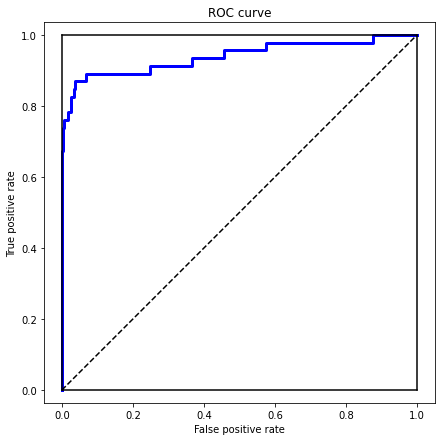

In [15]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(7, 7))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

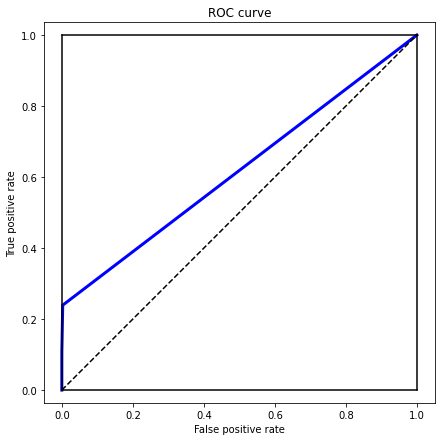

In [16]:
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

**Мой выбор**

Почему не стоит максимизировать accuracy

1) Мошенников очень мало, в сравнении с порядочными гражданами, поэтому значения accuracy всешда очень высокие

...анализ...

Проанализироав другие метрики, я принял решение максимизировать recall, тк наша задача наиболее точно определять нетепичное(мошенническое) передвижение денег на счетах. recall как раз позволит оценить долю объектов класса 1, которые наш классификатор определил правильно.

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [ ]:
lambdas = np.arange(0.05,0.4,0.05)
data = [[] for i in range(len(lambdas))]

for i in range(len(lambdas)):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=lambdas[i], random_state=42)

  log_reg.fit(X_train, y_train)
  y_pred_log_reg = log_reg.predict(X_test)

  y_pred_const = np.zeros(len(X_test))

  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)

  data[i].append(recall_score(y_test, y_pred_const))
  data[i].append(recall_score(y_test, y_pred_log_reg))
  data[i].append(recall_score(y_test, y_pred_knn))


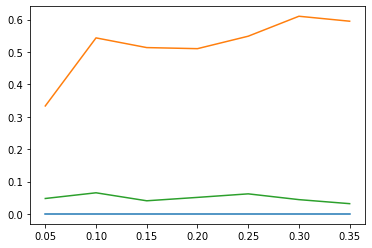

In [ ]:
data = np.array(data)

plt.plot(lambdas, data[:,0])
plt.plot(lambdas, data[:,1])
plt.plot(lambdas, data[:,2])

Из графика видно, что при большом размере датасета себя неплохой результат recall достигается при 30% размере тестовой выборки относительно всех данных.

Также не будем впредь рассатривать наивную модель, тк она не дает никакого результата.

Также можно наблюдать, что logreg справляется с поставленной задачей намного лучне, но knn не будем уберать из виду, оставим его для дальнейших наблюдений.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


recall_score(y_test, y_pred_log_reg), recall_score(y_test, y_pred_knn)

(0.6102941176470589, 0.04411764705882353)

Попробуем выкинуть признаки. Посмотрим на резутльтат.

In [20]:
lambdas = ['Time', 'V5', 'V9', 'V13', 'V17', 'Amount']
data = [[] for i in range(len(lambdas))]

for i in range(len(lambdas)):
  X = df.drop(columns=['Class', lambdas[i]])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  log_reg.fit(X_train, y_train)
  y_pred_log_reg = log_reg.predict(X_test)


  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)

  data[i].append(recall_score(y_test, y_pred_log_reg))
  data[i].append(recall_score(y_test, y_pred_knn))


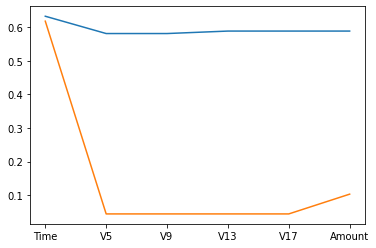

In [22]:
data = np.array(data)

plt.plot(lambdas, data[:,0])
plt.plot(lambdas, data[:,1])

In [18]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


В ходе эксперимента было установлено, что удаление, добавление, признаков я понял, что улучшения не происходит. Заметил, что при уделении Time knn выдает примерно тот же recall, что и logreg

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

https://www.kaggle.com/shivan118/hranalysis

In [151]:
df = pd.read_csv('test.csv')

In [152]:
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


Создадим искуственно 10 классов для avg_training_score

In [155]:
df.education.fillna('NS',inplace=True)
df.previous_year_rating.fillna(0.0,inplace=True)

In [156]:
df.loc[df['recruitment_channel'] == 'other', 'recruitment_channel'] = 0.0
df.loc[df['recruitment_channel'] == 'sourcing', 'recruitment_channel'] = 1.0
df.loc[df['recruitment_channel'] == 'referred', 'recruitment_channel'] = 2.0

In [157]:
df = df.drop(columns=['department','region'])

In [159]:
df.loc[df['gender'] == 'm', 'gender'] = 0.0
df.loc[df['gender'] == 'f', 'gender'] = 1.0

In [160]:
df.loc[df['education'] == 'NS', 'education'] = 0.0
df.loc[df['education'] == 'Below Secondary', 'education'] = 1.0
df.loc[df['education'] == "Bachelor's", 'education'] = 2.0
df.loc[df['education'] == "Master's & above", 'education'] = 3.0

In [161]:
df = df.astype(np.float16)

df

,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,2.0,0.0,1.0,1.0,24.0,0.0,1.0,1.0,0.0,77.0
1,2.0,1.0,0.0,1.0,31.0,3.0,5.0,0.0,0.0,51.0
2,2.0,0.0,0.0,1.0,31.0,1.0,4.0,0.0,0.0,47.0
3,2.0,1.0,0.0,3.0,31.0,2.0,9.0,0.0,0.0,65.0
4,2.0,0.0,1.0,1.0,30.0,4.0,7.0,0.0,0.0,61.0
...,...,...,...,...,...,...,...,...,...,...
23485,1.0,0.0,1.0,1.0,24.0,3.0,1.0,0.0,0.0,61.0
23486,2.0,0.0,1.0,1.0,31.0,3.0,7.0,0.0,0.0,74.0
23487,2.0,1.0,1.0,1.0,26.0,4.0,4.0,0.0,0.0,50.0
23488,2.0,0.0,1.0,3.0,27.0,0.0,1.0,0.0,0.0,70.0


In [183]:
print(Counter(df.education))

Counter({2.0: 15578, 3.0: 6504, 0.0: 1034, 1.0: 374})


Будем предсказывать уровень образования. Для этого произведем ряд нехитных операций с нашими данными, чтобы избавиться от строк.

NS = 0

Below Secondary = 1

Bachelor's = 2

Master's & above = 3

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [162]:
X = df.drop(columns=['education'])
y = df['education']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [163]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([3., 2., 2., ..., 3., 2., 2.], dtype=float16)

In [167]:
y_pred_proba_log_reg = log_reg.predict_proba(X_test)
y_pred_proba_log_reg[0]
sum(y_pred_proba_log_reg[0])

1.0

In [168]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [169]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([2., 2., 2., ..., 2., 3., 2.], dtype=float16)

In [170]:
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn[3]

array([0. , 0. , 0.8, 0.2])

In [186]:
y_pred_const = np.zeros(len(X_test)) 
y_pred_proba_const = y_pred_const
y_pred_proba_const

array([0., 0., 0., ..., 0., 0., 0.])

In [187]:
print(accuracy_score(y_test, y_pred_log_reg))
print(accuracy_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_const))

0.6680857102313041
0.6398467432950191
0.04328082872144175


In [188]:
print(precision_score(y_test, y_pred_log_reg, average='macro', zero_division='warn'))
print(precision_score(y_test, y_pred_knn, average='macro', zero_division='warn'))
print(precision_score(y_test, y_pred_const, average='macro', zero_division='warn'))
print()
print(precision_score(y_test, y_pred_log_reg, average='micro', zero_division='warn'))
print(precision_score(y_test, y_pred_knn, average='micro', zero_division='warn'))
print(precision_score(y_test, y_pred_const, average='micro', zero_division='warn'))

0.4401792139503439
0.44603095003677595
0.010820207180360437

0.6680857102313041
0.6398467432950191
0.04328082872144175


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
print(recall_score(y_test, y_pred_log_reg, average='macro'))
print(recall_score(y_test, y_pred_knn, average='macro'))
print(recall_score(y_test, y_pred_const, average='macro'))
print()
print(recall_score(y_test, y_pred_log_reg, average='micro'))
print(recall_score(y_test, y_pred_knn, average='micro'))
print(recall_score(y_test, y_pred_const, average='micro'))

0.3197828699741301
0.3785486228267761
0.25

0.6680857102313041
0.6398467432950191
0.04328082872144175


In [190]:
print(f1_score(y_test, y_pred_log_reg, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))
print(f1_score(y_test, y_pred_const, average='macro'))
print()
print(f1_score(y_test, y_pred_log_reg, average='micro'))
print(f1_score(y_test, y_pred_knn, average='micro'))
print(f1_score(y_test, y_pred_const, average='micro'))

0.33196229215676093
0.39999364226048745
0.02074265505984766

0.6680857102313041
0.6398467432950191
0.04328082872144175


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Попробую улучшить f1 метрику, тк она универсальнаЮ содержит в себе характер остальных метрик. 

In [195]:
X = df.drop(columns=['education', 'gender', 'age', 'avg_training_score'])
y = df['education']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

y_pred_const = np.zeros(len(X_test)) 
y_pred_proba_const = y_pred_const

In [196]:
print(f1_score(y_test, y_pred_log_reg, average='micro'))
print(f1_score(y_test, y_pred_knn, average='micro'))
print(f1_score(y_test, y_pred_const, average='micro'))

0.6680857102313041
0.6255144032921811
0.04328082872144175


1)Гендер не сильно влияет

0.6680857102313041

0.643820065276004

0.04328082872144175

2) Возраст тоже

0.6680857102313041

0.6204058464594863

0.04328082872144175

3)Результаты тестирования то же

0.6680857102313041

0.6255144032921811

0.04328082872144175

...

Как видно, то, что испытуемый не указал свой уровень образования не зависит от признаков выборки. Если и зависит, то некритично.

Поэтому предсказывать этот параметр не имеет смысла.